In [33]:
from skimage.io import imread
from skimage.transform import resize
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent=4) 
from tqdm import tqdm
from textwrap import wrap
import random
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, models, transforms
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F
#import albumentations as A
#from albumentations.pytorch.transforms import ToTensorV2
from sklearn import model_selection
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
import timm

In [34]:
import opendatasets as od
import pandas
data_path = 'C:\ip02-dataset-10labels/classification'
print(os.listdir(data_path))

['test', 'train', 'val']


In [35]:
def resize_all(src, width=224, height=None):
    """
    load images from path, resize them and write them as arrays to a dictionary, 
    together with labels and metadata. The dictionary is written to a pickle file 
    named '{pklname}_{width}x{height}px.pkl'.
     
    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    width: int
        target width of the image in pixels
    include: set[str]
        set containing str
    """
     
    height = height if height is not None else width
     
    traindata = dict()
    traindata['description'] = 'resized ({0}x{1})insect images in rgb'.format(int(width), int(height))
    traindata['label'] = []
    traindata['filename'] = []
    traindata['data'] = []   
    testdata = dict()
    testdata['description'] = 'resized ({0}x{1})insect images in rgb'.format(int(width), int(height))
    testdata['label'] = []
    testdata['filename'] = []
    testdata['data'] = []   
    valdata = dict()
    valdata['description'] = 'resized ({0}x{1})insect images in rgb'.format(int(width), int(height))
    valdata['label'] = []
    valdata['filename'] = []
    valdata['data'] = []   
    dicts = [testdata,traindata,valdata]
    #pklname = f"{pklname}_{width}x{height}px.pkl"
    y = 0
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        print(subdir)
        current_path = os.path.join(src, subdir)
        directory = current_path
        for subdir2 in os.listdir(current_path):
            print(current_path)
            current_path = os.path.join(directory, subdir2)
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height)) #[:,:,::-1]
                    dicts[y]['label'].append(subdir2)
                    dicts[y]['filename'].append(file)
                    dicts[y]['data'].append(im)
        y += 1
        #joblib.dump(data, pklname)
    return dicts

In [36]:
arr = resize_all(data_path)

test
C:\ip02-dataset-10labels/classification\test
C:\ip02-dataset-10labels/classification\test\0
C:\ip02-dataset-10labels/classification\test\1
C:\ip02-dataset-10labels/classification\test\2
C:\ip02-dataset-10labels/classification\test\3
C:\ip02-dataset-10labels/classification\test\4
C:\ip02-dataset-10labels/classification\test\5
C:\ip02-dataset-10labels/classification\test\6
C:\ip02-dataset-10labels/classification\test\7
C:\ip02-dataset-10labels/classification\test\8
train
C:\ip02-dataset-10labels/classification\train
C:\ip02-dataset-10labels/classification\train\0
C:\ip02-dataset-10labels/classification\train\1
C:\ip02-dataset-10labels/classification\train\2
C:\ip02-dataset-10labels/classification\train\3
C:\ip02-dataset-10labels/classification\train\4
C:\ip02-dataset-10labels/classification\train\5
C:\ip02-dataset-10labels/classification\train\6
C:\ip02-dataset-10labels/classification\train\7
C:\ip02-dataset-10labels/classification\train\8
val
C:\ip02-dataset-10labels/classification

In [41]:
df = pd.DataFrame(arr[0])
df.head

<bound method NDFrame.head of                                 description label   filename  \
0     resized (224x224)insect images in rgb     0  00000.jpg   
1     resized (224x224)insect images in rgb     0  00001.jpg   
2     resized (224x224)insect images in rgb     0  00004.jpg   
3     resized (224x224)insect images in rgb     0  00007.jpg   
4     resized (224x224)insect images in rgb     0  00010.jpg   
...                                     ...   ...        ...   
1972  resized (224x224)insect images in rgb     9  06558.jpg   
1973  resized (224x224)insect images in rgb     9  06560.jpg   
1974  resized (224x224)insect images in rgb     9  06563.jpg   
1975  resized (224x224)insect images in rgb     9  06567.jpg   
1976  resized (224x224)insect images in rgb     9  06569.jpg   

                                                   data  
0     [[[0.9867065765604378, 0.9856464624704244, 0.9...  
1     [[[0.3986480920493198, 0.5310285833083233, 0.1...  
2     [[[0.271224231880252,

In [42]:
df3 = pd.read_csv('118AData/val.csv')
df3.head

<bound method NDFrame.head of       Unnamed: 0                          description  label   filename  \
0              0  resized (64x64)insect images in rgb      0  00009.jpg   
1              1  resized (64x64)insect images in rgb      0  00012.jpg   
2              2  resized (64x64)insect images in rgb      0  00014.jpg   
3              3  resized (64x64)insect images in rgb      0  00034.jpg   
4              4  resized (64x64)insect images in rgb      0  00035.jpg   
...          ...                                  ...    ...        ...   
1297        1297  resized (64x64)insect images in rgb     16  11749.jpg   
1298        1298  resized (64x64)insect images in rgb     16  11750.jpg   
1299        1299  resized (64x64)insect images in rgb     16  11764.jpg   
1300        1300  resized (64x64)insect images in rgb     16  11797.jpg   
1301        1301  resized (64x64)insect images in rgb     16  11800.jpg   

                                                   data  
0     [[[0.

In [43]:
labels = {'labels':[0, 1, 2,3,4,5,6,7,8,9],'classes':['rice leaf roller','rice leaf caterpillar','paddy stem maggot',' asiatic rice borer  ','yellow rice borer','rice gall midge','Rice Stemfly','brown plant hopper','white backed plant hopper','small brown plant hopper']}

In [44]:
#labels = pd.read_csv('C:\ip02-dataset-10labels/classes.txt',sep = ' ',header = None, engine = 'python')
#labels.columns = ['label','classes']
labels = pd.DataFrame(labels)
labels

,labels,classes
0,0,rice leaf roller
1,1,rice leaf caterpillar
2,2,paddy stem maggot
3,3,asiatic rice borer
4,4,yellow rice borer
5,5,rice gall midge
6,6,Rice Stemfly
7,7,brown plant hopper
8,8,white backed plant hopper
9,9,small brown plant hopper


In [45]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(X = x_train, y = y_train, test_size = 0.33, random_state = 42)

In [10]:
#df2['data'] = df2['data'].replace('\n','',regex = True)
#print(np.array(float(df2['data'])))

In [46]:
def flatten(x):
    N = x.shape[0] # read in N, C, H, W
    return x.view(N, -1)  


In [53]:
x_train = arr[1]['data']
print(x_train[0].flatten())
for i in range(len(x_train)):
    x_train[i] = x_train[i].flatten()
#print(flatten(x_train[0]))
#for i in range(len(x_train)):
    #flatten(x_train[i])
#x_train = flatten(x_train)
y_train = arr[1]['label']
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
#print(len(X_train))
x_train = SelectKBest(f_classif, k = 2).fit_transform(x_train,y_train)
#neigh = KNeighborsClassifier(n_neighbors= 2)
#neigh.fit(x_train,y_train)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_train,y_train, test_size = 0.33, random_state = 42)
#print(X_train)


[0.52637798 0.73111739 0.19897137 ... 0.14305219 0.27016068 0.03110395]


In [23]:
#x_test = arr[0]['data']
#for i in range(len(x_test)):
#    x_test[i] = x_test[i].flatten()
#y_test = arr[0]['label']
#y_pred = neigh.predict(x_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [24]:
#print(len(x_test))
#print(len(y_test))
#print(neigh.score(x_test,y_test))


1977
1977
0.4365199797673242


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [75]:
acc = []
Big_N = [1,3,5,7,9,10,25,50]
for i in Big_N:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train,y_train)
    acc.append(neigh.score(X_test,y_test))

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

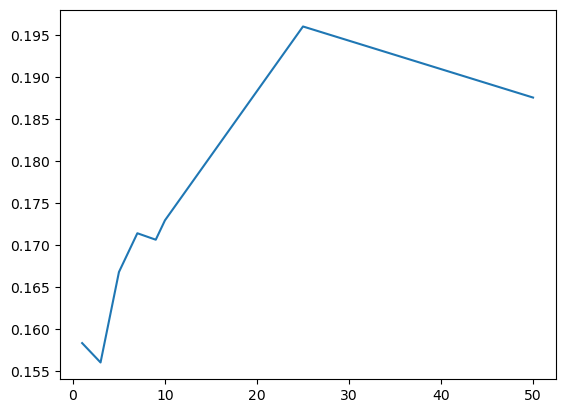

In [76]:
plt.plot(Big_N,acc)

In [17]:
#print(Big_N[np.argmax(acc)])

1


In [51]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import f_classif
#print(len(X_train))
#X_train = SelectKBest(f_classif, k = 2).fit_transform(X_train,y_train)
#print(len(x_train))

In [31]:
#x_test = SelectKBest(f_classif,k = 2).fit_transform(x_test,y_test)

2639
1301
0.9696854869268663


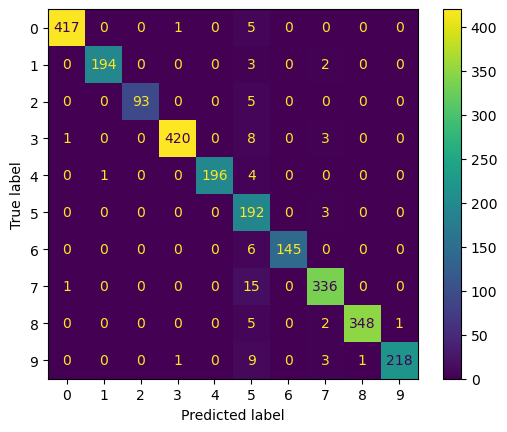

In [74]:
def accuracy(tn,fp,fn,tp):
    return (tn+tp)/(fn+fp+tn+tp)
from sklearn.ensemble import RandomForestClassifier
print(len(X_train))
print(len(X_test))
l = RandomForestClassifier(random_state=0,n_estimators= 1000).fit(X = X_train,y = y_train)
y_pred = l.predict(X_train)
print(l.score(X_train,y_train))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_train,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=l.classes_)
disp.plot()
plt.show()
#tn, fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()
#print(accuracy(tn, fp,fn,tp))

In [19]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
#clf.fit(x_train, y_train)
#print(clf.score(x_test,y_test))



Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.17448116833205227


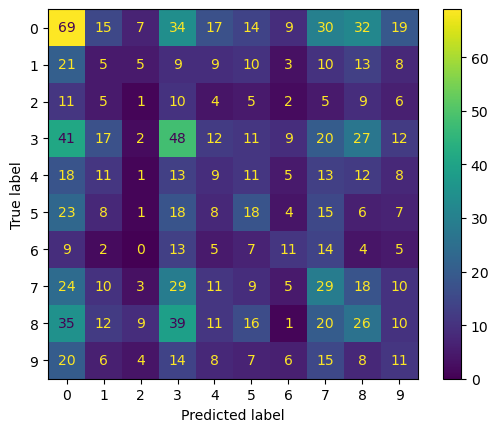

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
pipe = Pipeline([('classifier' , RandomForestClassifier())])
param_grid = [
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)
                                      'classifier__n_esti'
                                      }
]
clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(clf.score(X_test,y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=l.classes_)
disp.plot()
plt.show()